In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# modelo
m = 2
# tamanho da janela deslizante
n = 3
veremiPath = "/content/drive/MyDrive/dataset/veremi"
t2Path = "/veremiWithT2"
simcsvPath = '/simulationscsv'
window = "/window"+str(n)+"v2"
model = "/model"+str(m)
knnPath = '/knn'

os.chdir(veremiPath+t2Path+window+model+'/allscenarios2')
multi = pd.read_csv('allsc2.csv', index_col=0)
os.chdir(veremiPath+t2Path+window+model+'/allscenarios1')
binary = pd.read_csv('allsc1.csv', index_col=0)

# os.chdir(veremiPath+t2Path+window+knnPath+model)
# os.listdir()

In [ ]:
# All scenarios 1
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
data = binary.iloc[:, 0:-1].values
classes = binary.iloc[:, -1].values
lb = preprocessing.LabelBinarizer()
lb.fit(classes)
data_train, data_test, classes_train, classes_test = train_test_split(data, classes, train_size=0.9, test_size=0.001, random_state=1)
print('data_train', data_train.shape)
print('data_test', data_test.shape)
print('classes_train', classes_train.shape)
print('classes_test', classes_test.shape)

data_train (16669950, 2)
data_test (18523, 2)
classes_train (16669950,)
classes_test (18523,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
start_time = time.time()
clf.fit(data_train, classes_train)
print('Training done in ', "{:.2f}".format(time.time() - start_time)+' sec', sep='')

Training done in 25.88 sec


In [ ]:
proba = clf.predict_proba(data_test)

Best Threshold=0.800000, F-Score=0.848
----------------------------------------------------------------------
Classification Report for md2knnbinary
              precision    recall  f1-score   support

     class 0      0.942     0.994     0.967     14847
     class 1      0.969     0.754     0.848      3676

    accuracy                          0.946     18523
   macro avg      0.955     0.874     0.908     18523
weighted avg      0.948     0.946     0.944     18523

----------------------------------------------------------------------


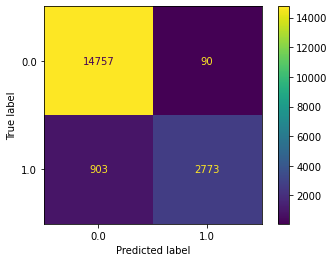

----------------------------------------------------------------------


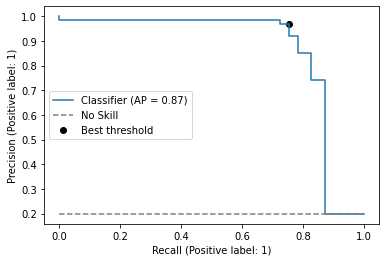

----------------------------------------------------------------------


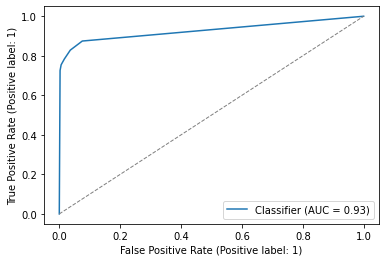

In [ ]:
# All scenarios - model allsc1
# metrics
from sklearn.preprocessing import MultiLabelBinarizer
clTest = classes_test
os.chdir(veremiPath+t2Path+window+knnPath+model+'/allscenarios1')
# Best threshold
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(clTest, proba[:, 1], pos_label=1)
# convert to f score
np.seterr(divide='ignore', invalid='ignore')
fscore = (2 * precision * recall) / (precision + recall)
np.nan_to_num(fscore, copy=False)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print("-"*70)
# Classification Report
from sklearn.metrics import classification_report
# predictsrelu = modelrelu.predict(data_test)
# clTest = lb.inverse_transform(classes_test)
pred = np.where(np.array(proba[:, 1]) >= thresholds[ix], 1, 0)
print('Classification Report for md'+str(m)+'knn'+'binary')
print(classification_report(clTest, pred, target_names=['class 0', 'class 1'], digits=3))
print("-"*70)
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# predrelu = lb.inverse_transform(predictsrelu, threshold=thresholds[ix])
cm = confusion_matrix(clTest, pred, labels=lb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lb.classes_)
disp.plot()
# plt.title('md'+str(m)+'w'+str(n)+'binary'+'.pdf')
plt.savefig('md'+str(m)+'knn'+'binary'+'.pdf')
plt.show()
print("-"*70)
# Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(clTest, proba[:, 1], pos_label=1)
# plt.title('PR curve '+'md'+str(m)+'w'+str(n)+'binary'+'.pdf')
no_skill = len(clTest[clTest==1]) / len(clTest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', color="grey", label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')
plt.legend()
plt.savefig('PRcurve '+'md'+str(m)+'knn'+'binary'+'.pdf')
plt.show()
print("-"*70)
# ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(clTest, proba[:, 1], pos_label=1)
# plt.title('ROC curve '+'md'+str(m)+'w'+str(n)+'binary'+'.pdf')
plt.plot([0, 1], [0, 1], color="grey", lw=1, linestyle="--")
plt.savefig('ROCcurve '+'md'+str(m)+'knn'+'binary'+'.pdf')
plt.show()

In [ ]:
# All scenarios 2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
# multi.iloc[:, -1].unique()
# split data and label
data = multi.iloc[:, 0:-1].values
classes = multi.iloc[:, -1].values
# # multilabel binarize
lb = preprocessing.LabelBinarizer()
lb.fit(classes)
# split test and train
data_train, data_test, classes_train, classes_test = train_test_split(data, classes, train_size=0.9, test_size=0.001, random_state=1)
print('data_train', data_train.shape)
print('data_test', data_test.shape)
print('classes_train', classes_train.shape)
print('classes_test', classes_test.shape)

data_train (16669950, 2)
data_test (18523, 2)
classes_train (16669950,)
classes_test (18523,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
start_time = time.time()
clf.fit(data_train, classes_train)
print('Training done in ', "{:.2f}".format(time.time() - start_time)+' sec', sep='')
proba = clf.predict_proba(data_test)

Training done in 28.61 sec


Classification Report for md2knnmulti
              precision    recall  f1-score   support

     class 0      0.947     0.985     0.966     14847
     class 1      0.691     0.554     0.615       735
     class 2      0.653     0.400     0.496       733
     class 4      0.999     0.999     0.999       746
     class 8      0.938     0.960     0.948       719
    class 16      0.700     0.521     0.597       743

    accuracy                          0.926     18523
   macro avg      0.821     0.736     0.770     18523
weighted avg      0.917     0.926     0.919     18523

----------------------------------------------------------------------


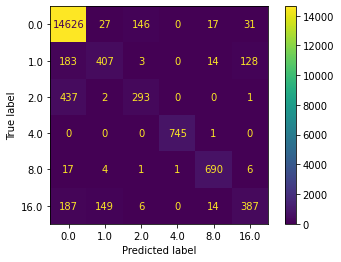

In [ ]:
# All scenarios - model allsc2
# metrics
os.chdir(veremiPath+t2Path+window+knnPath+model+'/allscenarios1')
# Classification Report
from sklearn.metrics import classification_report
clTest = classes_test
pred = lb.inverse_transform(proba)
classlist = []
for cl in lb.classes_:
  classlist.append('class '+str(int(cl)))
print('Classification Report for md'+str(m)+'knn'+'multi')
print(classification_report(clTest,
                            pred,
                            target_names=classlist,
                            digits=3,
                            zero_division=0))
print("-"*70)
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(clTest, pred, labels=lb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lb.classes_)
disp.plot()
# plt.title('md'+str(m)+'w'+str(n)+'multi'+'.pdf')
plt.savefig('md'+str(m)+'knn'+'multi'+'.pdf')
plt.show()